In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pklt

In [2]:
df =pd.read_csv('Zomato.csv')

In [3]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


In [4]:
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         148 non-null    object
 1   online_order                 148 non-null    object
 2   book_table                   148 non-null    object
 3   rate                         148 non-null    object
 4   votes                        148 non-null    int64 
 5   approx_cost(for two people)  148 non-null    int64 
 6   listed_in(type)              148 non-null    object
dtypes: int64(2), object(5)
memory usage: 8.2+ KB


In [8]:
df.isnull().sum()

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
approx_cost(for two people)    0
listed_in(type)                0
dtype: int64

In [11]:
def handleRate(value):
    value = str(value).split('/')
    return float(value[0])
df['rate']= df['rate'].apply(handleRate)

In [12]:
print(df['rate'])

0      4.1
1      4.1
2      3.8
3      3.7
4      3.8
      ... 
143    3.3
144    3.3
145    4.0
146    3.0
147    3.9
Name: rate, Length: 148, dtype: float64


Text(0.5, 1.0, 'Type of Restaurant')

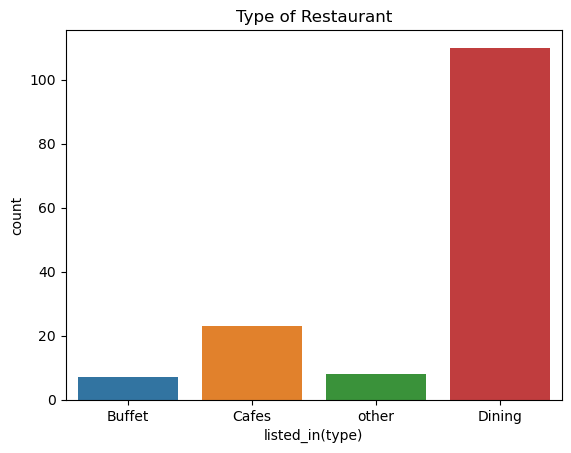

In [17]:
# Type of Restaurant
sns.countplot(x=df['listed_in(type)'])
pklt.title('Type of Restaurant')

# from the chart it is evident that majarity of the people order from Dining restaurant

Text(0, 0.5, 'No of votes')

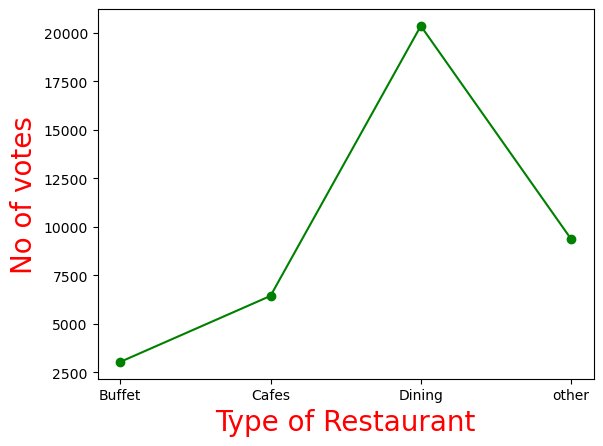

In [34]:
Grouped = df.groupby('listed_in(type)')['votes'].sum()
result =pd.DataFrame({'votes': Grouped})
pklt.plot(result, c='green', marker='o')
pklt.xlabel('Type of Restaurant', c='red', size=20)
pklt.ylabel('No of votes', c='red',size=20)

# dining restaurant has more no of votes

Text(0.5, 1.0, 'Ratings Distribution')

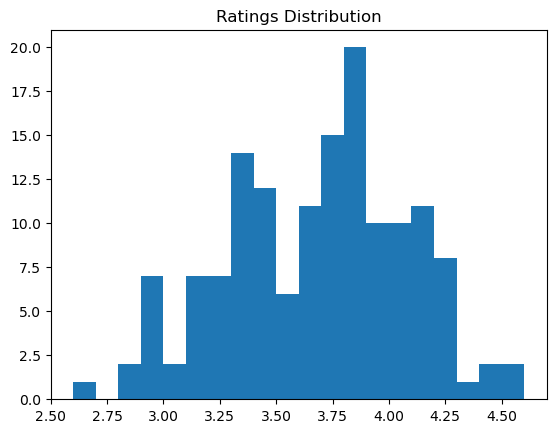

In [41]:
pklt.hist(df['rate'],bins=20)
pklt.title('Ratings Distribution')

# The amjority restaurants recieved rating from 3.5 to 4

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

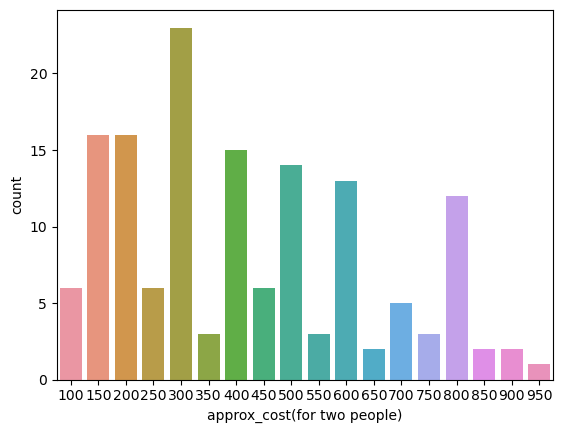

In [42]:
sns.countplot(x=df['approx_cost(for two people)'])

# Most of the couple people order with average rupees of 300

In [46]:
Avg_Rating = df.groupby('online_order')['rate'].max()
print(Avg_Rating)

online_order
No     4.3
Yes    4.6
Name: rate, dtype: float64


<Axes: xlabel='online_order', ylabel='rate'>

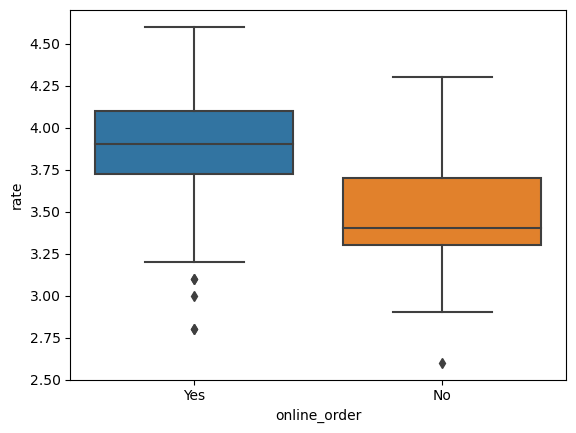

In [48]:
sns.boxplot(x='online_order', y='rate', data=df)

# Offline orders received lower rating compared to online

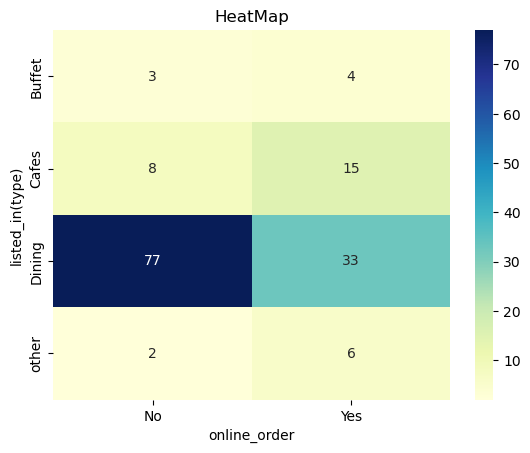

In [52]:
pivot_table = df.pivot_table(index='listed_in(type)', columns = 'online_order',aggfunc ='size',fill_value = 0)
sns.heatmap(pivot_table, annot =True,cmap='YlGnBu')
pklt.title('HeatMap')
pklt.xlabel('online_order')
pklt.ylabel('listed_in(type)')
pklt.show()

# Dining restaurants primiarly gets Offline orders that means most people prefer to dine in whereas in Cafe type most people pprefer to order Online